 # Objects in Low-Earth Orbit

 The purpose of this project is analyzing different data from objects in Low Earth Orbit, including active satellites and space debris. The current boom in the space industry (in both government agencies and private firms) is unprecedented and, while promising for the future of humanity, it poises a potential hazard to future enterprises. The number of satellites is growing exponentially, and with it the amount of space debris. This, if left unchecked,  could potentially clutter the rocket launch trajectory (near the equator, due to having a bigger angular velocity, providing a significant boost in speed to the spaceship), and leave humanity earth-bound forever. 
 
 Using satellite launch history and key orbital elements such as eccentricity, inclination, asceding node, periapsis, apoapsis, among others, we will be able to roughly estimate how cluttered this key launch zone is and if specific action is needed to ensure the safety of future space missions.
 
 This dataframe was downloaded from Kaggle and contains 14,371 observations. It is important to point out, however, that there is an unknown number of classified satellites and space debris. We will try to take this into account during our analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Projects/Objects in LEO and NEO/space_decay.csv')
pd.set_option('display.max_columns', None)
df.head()

,CCSDS_OMM_VERS,COMMENT,CREATION_DATE,ORIGINATOR,OBJECT_NAME,OBJECT_ID,CENTER_NAME,REF_FRAME,TIME_SYSTEM,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT,SEMIMAJOR_AXIS,PERIOD,APOAPSIS,PERIAPSIS,OBJECT_TYPE,RCS_SIZE,COUNTRY_CODE,LAUNCH_DATE,SITE,DECAY_DATE,FILE,GP_ID,TLE_LINE0,TLE_LINE1,TLE_LINE2
0,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:46:11,18 SPCS,ARIANE 42P+ DEB,1992-072J,EARTH,TEME,UTC,SGP4,2021-10-31T22:46:50.340864,2.921700,0.652893,7.7156,90.2410,243.1216,38.7796,0,U,26741,999,23588,0.024341,8.830000e-06,0.0,20668.618,492.864,27784.871,796.095,DEBRIS,MEDIUM,FR,1992.0,FRGUI,NaN,3195178,188614016,0 ARIANE 42P+ DEB,1 26741U 92072J 21304.94919376 .00000883 0...,2 26741 7.7156 90.2410 6528926 243.1216 38...
1,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,SL-8 DEB,1979-028C,EARTH,TEME,UTC,SGP4,2021-10-31T16:32:17.360448,13.754973,0.003072,82.9193,299.1120,158.9093,201.3337,0,U,26743,999,50124,0.000066,7.900000e-07,0.0,7358.038,104.689,1002.507,957.299,DEBRIS,SMALL,CIS,1979.0,PKMTR,NaN,3194950,188593285,0 SL-8 DEB,1 26743U 79028C 21304.68908982 .00000079 0...,2 26743 82.9193 299.1120 0030720 158.9093 201...
2,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T06:26:11,18 SPCS,GSAT 1,2001-015A,EARTH,TEME,UTC,SGP4,2021-11-01T05:22:43.421952,1.038224,0.023739,12.1717,16.5368,250.1248,146.2900,0,U,26745,999,7798,0.000000,-1.650000e-06,0.0,41197.852,1386.984,35797.696,33841.738,PAYLOAD,LARGE,IND,2001.0,SRI,NaN,3195026,188609573,0 GSAT 1,1 26745U 01015A 21305.22411368 -.00000165 0...,2 26745 12.1717 16.5368 0237386 250.1248 146...
3,2,GENERATED VIA SPACE-TRACK.ORG API,2021-10-31T18:07:15,18 SPCS,CZ-4 DEB,1999-057MB,EARTH,TEME,UTC,SGP4,2021-10-31T11:11:24.198720,14.775907,0.006062,98.4781,8.7205,37.3771,323.1632,0,U,26754,999,10204,0.000316,2.265000e-05,0.0,7015.076,97.456,679.465,594.417,DEBRIS,SMALL,PRC,1999.0,TSC,NaN,3194431,188556894,0 CZ-4 DEB,1 26754U 99057MB 21304.46625230 .00002265 0...,2 26754 98.4781 8.7205 0060618 37.3771 323...
4,2,GENERATED VIA SPACE-TRACK.ORG API,2021-11-01T04:58:37,18 SPCS,CZ-4 DEB,1999-057MC,EARTH,TEME,UTC,SGP4,2021-10-31T17:46:46.681248,14.724482,0.006226,98.4232,122.0724,345.1605,27.6061,0,U,26755,999,9622,0.000408,2.610000e-05,0.0,7031.400,97.796,697.039,609.491,DEBRIS,SMALL,PRC,1999.0,TSC,NaN,3194950,188592541,0 CZ-4 DEB,1 26755U 99057MC 21304.74081807 .00002610 0...,2 26755 98.4232 122.0724 0062255 345.1605 27...



 ## Data Cleaning 

 ### Null Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14372 entries, 0 to 14371
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CCSDS_OMM_VERS       14372 non-null  int64  
 1   COMMENT              14372 non-null  object 
 2   CREATION_DATE        14372 non-null  object 
 3   ORIGINATOR           14372 non-null  object 
 4   OBJECT_NAME          14372 non-null  object 
 5   OBJECT_ID            14333 non-null  object 
 6   CENTER_NAME          14372 non-null  object 
 7   REF_FRAME            14372 non-null  object 
 8   TIME_SYSTEM          14372 non-null  object 
 9   MEAN_ELEMENT_THEORY  14372 non-null  object 
 10  EPOCH                14372 non-null  object 
 11  MEAN_MOTION          14372 non-null  float64
 12  ECCENTRICITY         14372 non-null  float64
 13  INCLINATION          14372 non-null  float64
 14  RA_OF_ASC_NODE       14372 non-null  float64
 15  ARG_OF_PERICENTER    14372 non-null 


 There are a few variables containing null values. 
 
 Firstly, the decay date variables only contains null values, which makes sense given that all observations are still in orbit. We will delete this variable.

In [5]:
df = df.drop('DECAY_DATE', axis=1)


 Secondly, the object ID, country code, launch date and site variables all have 38 null values. In this case, the satellited have not yet been launched, as of 2021 (which is the cutoff date for this dataframe). As we are analyzing the objects already in orbit, we will omit this observations.

In [6]:
mask = df['COUNTRY_CODE'].notna()
df = df[mask]


 Lastly, the RCS size variable (Radar cross-section size) has 159 null values. This is not problematic, as we are interested in the trend of amount of space debris and, while the size is a valuable metric, it is not essential. We will not delete those observations.
 
 We are left with a total of 14,333 observations.

 ### Outliers

 On the charts below, we can see that the vast majority of objects have an apoapsis (highest distance from earth within the orbit) relatively close to earth. Thus, we will clean the data to take care of outliers to get clarification of the where the orbits are relative to earth. To do this, we will omit outliers according to the Interquartile Range method.
 
 We will only deal with upper bound outliers, as the lower bound will be so close to earth's atmosphere that any object in this range will eventually slow down and reenter earth.

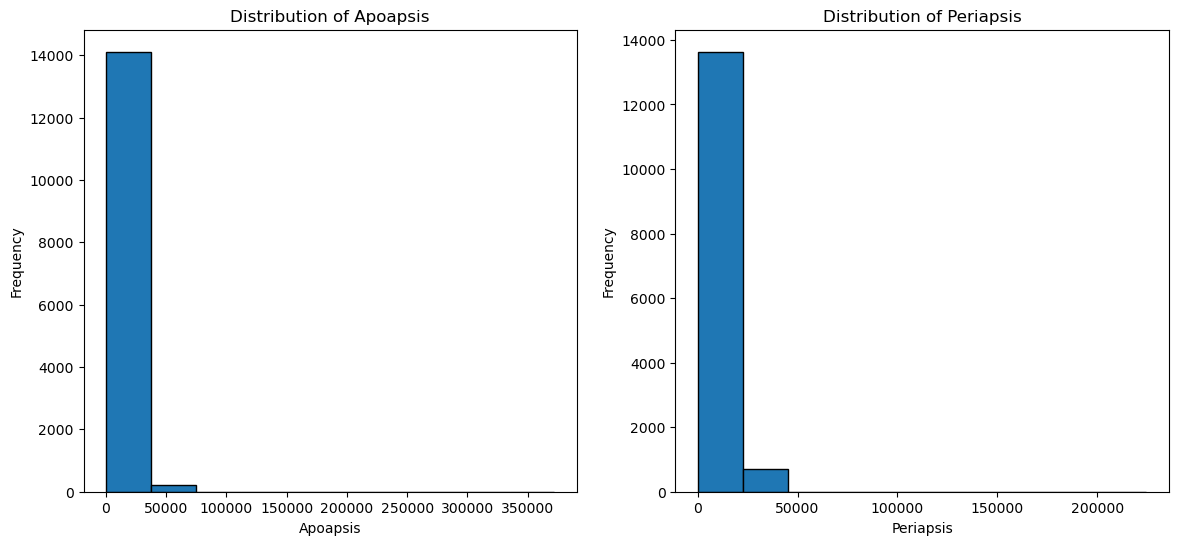

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

axes[0].hist(df['APOAPSIS'], bins=10, edgecolor='black')
axes[0].set_xlabel('Apoapsis')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Apoapsis')

axes[1].hist(df['PERIAPSIS'], bins=10, edgecolor='black')
axes[1].set_xlabel('Periapsis')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Periapsis')

plt.show();

In [8]:
def remove_outliers(df, column):
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    iqr = q3 - q1
    
    upper_bound = q3 + 1.5 * iqr
    return df[df[column] <= upper_bound]

In [9]:
df_clean = remove_outliers(df, 'APOAPSIS')
df_clean = remove_outliers(df_clean, 'PERIAPSIS')

In [10]:
df_clean.count()

CCSDS_OMM_VERS         11175
COMMENT                11175
CREATION_DATE          11175
ORIGINATOR             11175
OBJECT_NAME            11175
OBJECT_ID              11175
CENTER_NAME            11175
REF_FRAME              11175
TIME_SYSTEM            11175
MEAN_ELEMENT_THEORY    11175
EPOCH                  11175
MEAN_MOTION            11175
ECCENTRICITY           11175
INCLINATION            11175
RA_OF_ASC_NODE         11175
ARG_OF_PERICENTER      11175
MEAN_ANOMALY           11175
EPHEMERIS_TYPE         11175
CLASSIFICATION_TYPE    11175
NORAD_CAT_ID           11175
ELEMENT_SET_NO         11175
REV_AT_EPOCH           11175
BSTAR                  11175
MEAN_MOTION_DOT        11175
MEAN_MOTION_DDOT       11175
SEMIMAJOR_AXIS         11175
PERIOD                 11175
APOAPSIS               11175
PERIAPSIS              11175
OBJECT_TYPE            11175
RCS_SIZE               11174
COUNTRY_CODE           11175
LAUNCH_DATE            11175
SITE                   11175
FILE          


 With the outliers removed, we are left with 11,175 observations and can now plot again and study the distribution of apoapsis and periapsis in more detail:

 ### Orbital Elements

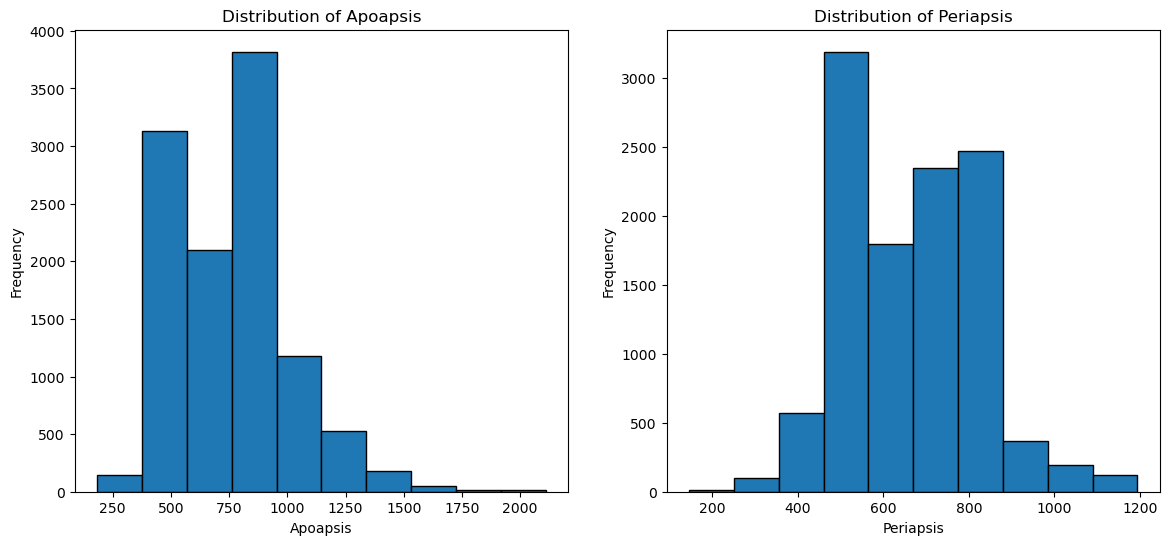

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].hist(df_clean['APOAPSIS'], bins=10, edgecolor='black')
axes[0].set_xlabel('Apoapsis')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Apoapsis')

axes[1].hist(df_clean['PERIAPSIS'], bins=10, edgecolor='black')
axes[1].set_xlabel('Periapsis')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Periapsis')

plt.show();

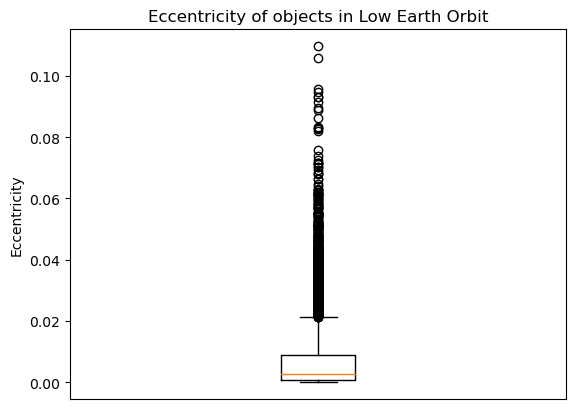

In [12]:
plt.boxplot(df_clean['ECCENTRICITY'])
plt.xticks([])
plt.ylabel('Eccentricity')
plt.title('Eccentricity of objects in Low Earth Orbit');


 We can see that the vast majority of objects have an apoapsis not higher than 1,000 km from earth's surface, while the periapsis is at 900 km from earth's surface or lower. We can also see that the distribution of the objects' eccentricity is very heavily skewed towards 0, meaning that the objects can be best described as having a circular orbit (small difference between their apoapsis and periapsis).

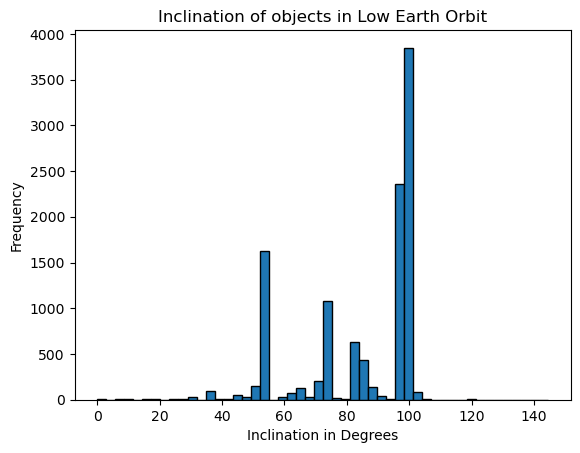

In [13]:
plt.hist(df_clean['INCLINATION'], bins=50, edgecolor='black')
plt.xlabel('Inclination in Degrees')
plt.ylabel('Frequency')
plt.title('Inclination of objects in Low Earth Orbit')
plt.show();


We are also interested in the objects' inclination relative to earth's equatorial plane, because the launch trajectory of space missions is largely dependent on the launch site's latitude. We can see a large concentration of objects on polar orbits (~ 90º, used for earth observation satellites) and sun-synchronous orbits (~ 98º, used to allow satellites to pass over the same part of the earth at roughly the same solar time). The rest of the objects' inclinations are explained by the latitude of the most used launch sites: Plesetsk Cosmodrome in Russia (62.9º N, with over 1,600 launches), Baikonur Cosmodrome in Kazhakhstan (45.6º N, with over 1,500 launches) and the Kennedy Space Center in the United States (28.5º N, with over 900 launches).

 ### Categorical Variables

 It's also important to understand the distribution of the categorical variables. We can gain some very important information, such as the proportion of satellites to debris and the country of origin of each object.

In [14]:
types = df_clean['OBJECT_TYPE'].value_counts()
countries = df_clean['COUNTRY_CODE'].value_counts()
sizes = df_clean['RCS_SIZE'].value_counts()
classes = df_clean['CLASSIFICATION_TYPE'].value_counts()
centers = df_clean['CENTER_NAME'].value_counts()

In [15]:
def add_percentage(column_value_counts):
    df = column_value_counts.reset_index()
    df.columns = ['Value', 'Count']
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total) * 100
    df['Percentage'] = df['Percentage'].map('{:.3f}%'.format)
    return df

In [16]:
types_df = add_percentage(types)
countries_df = add_percentage(countries)
sizes_df = add_percentage(sizes)
classes_df = add_percentage(classes)
centers_df = add_percentage(centers)

print('Object Type:\n', types_df, '\n')
print('Launch Country:\n', countries_df, '\n')
print('RCS Size:\n', sizes_df, '\n')
print('Classification:\n', classes_df, '\n')
print('Orbital Center:\n', centers_df, '\n')

Object Type:
          Value  Count Percentage
0       DEBRIS   6909    61.826%
1      PAYLOAD   3826    34.237%
2  ROCKET BODY    233     2.085%
3          TBA    207     1.852% 

Launch Country:
    Value  Count Percentage
0     US   4291    38.398%
1    PRC   3573    31.973%
2    CIS   2199    19.678%
3     UK    141     1.262%
4    IND    135     1.208%
..   ...    ...        ...
73  IRAQ      1     0.009%
74  MALA      1     0.009%
75  VTNM      1     0.009%
76  BELA      1     0.009%
77   BGR      1     0.009%

[78 rows x 3 columns] 

RCS Size:
     Value  Count Percentage
0   SMALL   7602    68.033%
1   LARGE   2534    22.678%
2  MEDIUM   1038     9.289% 

Classification:
   Value  Count Percentage
0     U  11175   100.000% 

Orbital Center:
    Value  Count Percentage
0  EARTH  11175   100.000% 




 There are a few statistics to note: 
  - There are almost double the observations categorized as debris than satellites. This is not a surpise given the different situations that can create debris besides a decommisioned satellite. Sometimes, for example, parts of satellites break down and break away from the vessel. There are also 233 observations of rocket bodies orbiting the earth. These are presumably much larger than satellites and debris, and are created by stage dettachment on space missions.
  - We confirm the assumption than the US, the People's Republic of China and the CIS (Commonwealth of Independent States, including Russia, Kazakhstan, Belarus, among others) are the most active countries in the space industry, with roughly 90% of the objects in our database being launched by one of them. Admittably, the database does not account for the European Space Agency (ESA), listing the launches of each member country separately.
  - The vast majority of objects orbiting earth are considered to be small. Refering back to our first observation, this majority can be explained by parts that break away due to technical problems or minor collisions with space debris. These small objects are considered to be a big hazard to space missions, due to the difficulty of observing them. A collision with a small object travelling at a fast enough speed can prove fatal to a vessel.
  - Finally, as expected, all observations are both unclassified and orbiting Earth.

 Thus, we will filter the dataframe to contain only variables that differentiate each observation from the others:

In [17]:
df_clean = df_clean[['OBJECT_NAME', 'OBJECT_ID', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION',
                     'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'EPHEMERIS_TYPE',
                     'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS',
                     'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE',
                     'LAUNCH_DATE', 'SITE']].reset_index(drop=True)

In [18]:
df_clean['LAUNCH_DATE'] = df_clean['LAUNCH_DATE'].astype(int)


 ### EDA

 Let's see the number of objects in space by year. This might help us project the number of launches in the future, considering the current space industry boom.

In [19]:
df_clean['CUMULATIVE_COUNT'] = df_clean.groupby('LAUNCH_DATE').cumcount() + 1
df_cumulative = df_clean.groupby('LAUNCH_DATE').size().cumsum().reset_index(name='CUMULATIVE_COUNT')

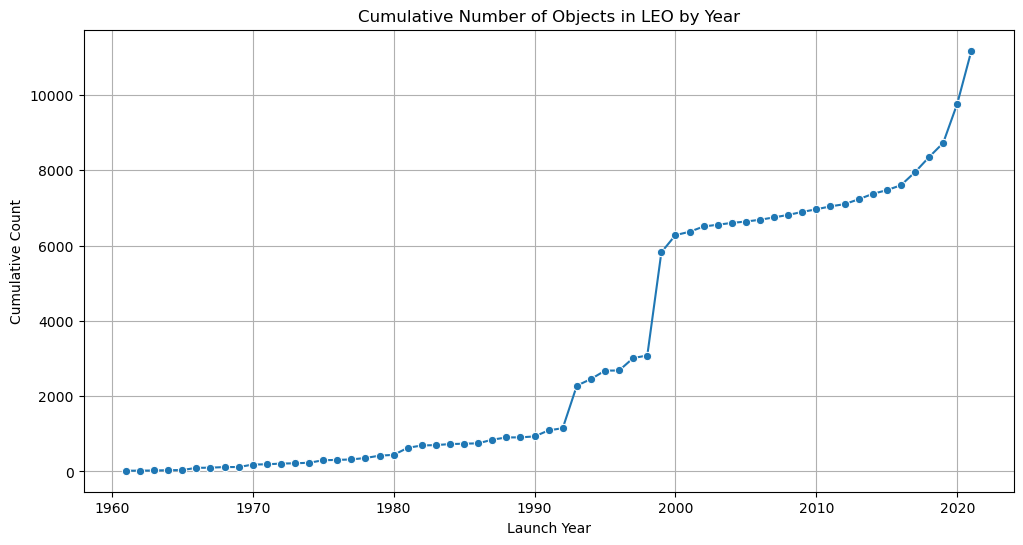

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_cumulative, x='LAUNCH_DATE', y='CUMULATIVE_COUNT', marker='o')
plt.title('Cumulative Number of Objects in LEO by Year')
plt.xlabel('Launch Year')
plt.ylabel('Cumulative Count')
plt.grid(True)
plt.show()


 Let's analyze the different time periods portrayed in the chart. When the Soviet Union launched the Sputnik I satellite, it marked the beginning of the space age. This was followed by numerous launches by both the Soviet Union and the US in the early 1960s (space race). 
 
 In the late 60s and early 70s, the Apollo missions ensued a higher budget for space agencies and thus a higher, more consistent number of launches. 
 
 In the 1980s, commercial entities began deploying satellites. The use of private capital destined to space endeavors facilitated the rapid growth of objects being launched into LEO and GEO.
 
 In the 1990s and 2000s, the proliferation of satellite constellations and the miniaturization of satellite technology gave way to a growth in objects and satellites in LEO with no precedent. These technological advancements lowered the launch cost by such a margin that there were more functions a satellite could employ while being cost effective.

 Finally, in the 2010s and 2020s, the rise of privately-owned space companies introduced more agents capable of putting objects in LEO. These companies (SpaceX, Blue Origin, among others) are not restricted by federal funds, and thus are able to spend their resources in riskier affairs. For example, SpaceX's invention and succesful application of reusable rockets and boosters have drastically reduced the cost of launching satellites, permitting more frequent launches.
 

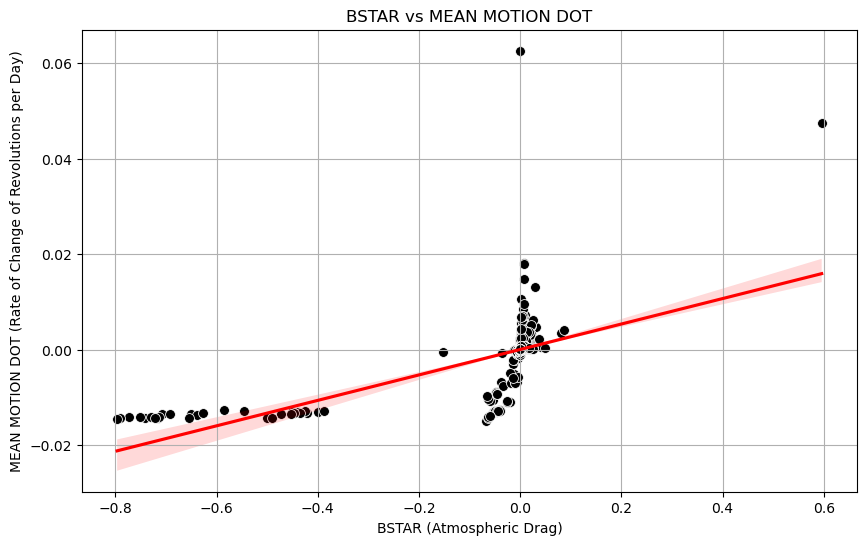

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='BSTAR', y='MEAN_MOTION_DOT', s=50, color='black')
sns.regplot(data=df_clean, x='BSTAR', y='MEAN_MOTION_DOT', scatter=False, color='r')
plt.title('BSTAR vs MEAN MOTION DOT')
plt.xlabel('BSTAR (Atmospheric Drag)')
plt.ylabel('MEAN MOTION DOT (Rate of Change of Revolutions per Day)')
plt.grid(True)
plt.show()

The BSTAR value can be negative to account for anomalies or to fit observational data to the orbital model. For this analysis, thus, we will consider the BSTAR variable to be an absolute value, as we are only interested in the magnitude.

Having said that, we can appreciate in the chart a basic but often misinterpreted concept in orbital mechanics. As the atmospheric drag acts on an object, it slows the object down, causing the orbit to be lower and in turn, speeding the object up. This cycle continues until the atmospheric drag gets high enough, at which point the object de-orbits.